In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#%% Prepare dataset

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Model / data parameters
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1::]

In [3]:
#%% Create model
inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape)(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="alexnet")

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)


print(model.summary())

Model: "alexnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        38464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 96)          55392     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 96)          8304

In [4]:
#%% Train model

batch_size = 256
epochs = 50

earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    callbacks=[earlystop],
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))

Epoch 1/50
235/235 [==============================] - 9s 20ms/step - loss: 0.4488 - accuracy: 0.8815 - val_loss: 0.0599 - val_accuracy: 0.9799
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0705 - accuracy: 0.9790 - val_loss: 0.0425 - val_accuracy: 0.9861
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0501 - accuracy: 0.9855 - val_loss: 0.0527 - val_accuracy: 0.9834
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0399 - accuracy: 0.9881 - val_loss: 0.0323 - val_accuracy: 0.9908
Epoch 5/50
235/235 [==============================] - 4s 16ms/step - loss: 0.0355 - accuracy: 0.9894 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 6/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0328 - val_accuracy: 0.9922
Epoch 7/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0293 - val_accuracy: 0.9915

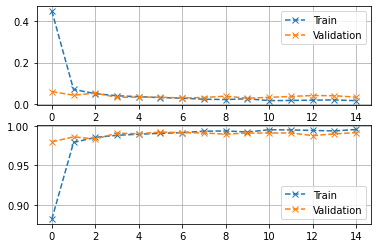

In [5]:
#%% Model visualization
plt.figure()
plt.subplot(2, 1, 1)
plt.grid()
plt.plot(history.history['loss'], '--x')
plt.plot(history.history['val_loss'], '--x')
plt.legend(['Train', 'Validation'])
plt.subplot(2, 1, 2)
plt.grid()
plt.plot(history.history['accuracy'], '--x')
plt.plot(history.history['val_accuracy'], '--x')
plt.legend(['Train', 'Validation'])

In [6]:
#%% Model evaluation
result = model.evaluate(x_test, y_test)
print("Test accuracy: {:.2f}%".format(result[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0282 - accuracy: 0.9909
Test accuracy: 99.09%
